In [3]:
# Кластеризация временных рядов
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# получение исходных данных
# Пример - данные таможенной статистики - импорт и экспорт товаров
# http://stat.customs.gov.ru/unload


# Данные ФТС за январь, например, для Владимирской области:
url = 'https://github.com/ankislyakov/ONI/raw/main/import_export_vl.csv'

df = pd.read_csv(url, sep=';')
df['month']= pd.to_datetime(df['month'])
df

,Unnamed: 0,direction,month,country,code,measure,value,netto,quantity,region,district
0,245,ИМ,2016-01-01,GB,8538909100,1,2315.00,5.0,0.00,17,1
1,590,ИМ,2016-01-01,IT,8505902009,1,585.00,1.0,0.00,17,1
2,705,ИМ,2016-01-01,TR,3907999000,1,3549.00,700.0,0.00,17,1
3,762,ИМ,2016-01-01,CN,7318149100,1,1.00,0.0,0.00,17,1
4,978,ИМ,2016-01-01,CN,7315111000,1,342.00,340.0,0.00,17,1
...,...,...,...,...,...,...,...,...,...,...,...
235942,25329119,ИМ,2021-12-01,LT,1520000000,1,156826.53,192170.0,0.00,17,1
235943,25329120,ЭК,2021-12-01,KZ,1006302500,1,35.15,15.0,0.00,17,1
235944,25338369,ЭК,2021-02-01,EE,4407129100,М3,100265.71,233072.0,501.23,17,1
235945,25338370,ЭК,2021-05-01,EE,4407129100,М3,185009.78,264090.0,589.20,17,1


In [5]:
NOC = pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8') [0] [['Наименование', 'Alpha2']]

In [6]:
df = df.merge(NOC, left_on='country', right_on='Alpha2')

In [7]:
df.head()

,Unnamed: 0,direction,month,country,code,measure,value,netto,quantity,region,district,Наименование,Alpha2
0,245,ИМ,2016-01-01,GB,8538909100,1,2315.0,5.0,0.0,17,1,Соединенное Королевство,GB
1,590,ИМ,2016-01-01,IT,8505902009,1,585.0,1.0,0.0,17,1,Италия,IT
2,705,ИМ,2016-01-01,TR,3907999000,1,3549.0,700.0,0.0,17,1,Турция,TR
3,762,ИМ,2016-01-01,CN,7318149100,1,1.0,0.0,0.0,17,1,Китай,CN
4,978,ИМ,2016-01-01,CN,7315111000,1,342.0,340.0,0.0,17,1,Китай,CN


In [8]:
# для того, чтобы получить временные ряды, построим сводную таблицу по объемам экспорта
tab = pd.pivot_table(df[df['direction']=='ЭК'],
                     index='month',
                     columns = 'Наименование',
                     values = 'value',
                     aggfunc='sum',
                     fill_value=0,
                     margins =False)

tab=tab.drop(columns=tab.columns[((tab==0).mean()>0.8)],axis=1)
tab

Наименование,Абхазия,Австралия,Австрия,Азербайджан,Алжир,Аргентина,Армения,Афганистан,Бангладеш,Беларусь,...,Финляндия,Франция,Хорватия,Чешская Республика,Чили,Швейцария,Швеция,Эстония,Южная Осетия,Япония
month,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.00,0.00,200747.00,309743.00,0.0,0.00,40897.00,0.0,0.00,3.004347e+06,...,46815.00,57244.00,0.00,19541.00,0.0,0.0,40644.00,239815.00,0.00,0.00
2016-02-01,57671.00,13558.00,217861.00,390348.00,22787888.0,0.00,515037.00,0.0,1963422.00,5.480527e+06,...,123759.00,137663.00,23506.00,180051.00,0.0,19894.0,40005.00,338436.00,0.00,0.00
2016-03-01,120573.00,9233.00,259206.00,1377297.00,0.0,0.00,774442.00,0.0,0.00,6.693229e+06,...,89977.00,68253.00,10128.00,122794.00,0.0,0.0,27870.00,437019.00,0.00,22562.00
2016-04-01,65525.00,4930.00,369505.00,957302.00,21098632.0,0.00,467735.00,0.0,0.00,5.495055e+06,...,134553.00,79776.00,36196.00,118997.00,0.0,2684.0,38379.00,388217.00,0.00,0.00
2016-05-01,98493.00,20549.00,109798.00,731748.00,1782349.0,0.00,360583.00,0.0,0.00,5.604224e+06,...,105503.00,41113.00,13876.00,67806.00,0.0,8376.0,52150.00,298519.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,227869.81,0.00,339678.76,2481786.85,0.0,15124320.00,1579198.84,0.0,23235.30,1.826629e+07,...,216179.13,1790234.73,51334.54,1009205.78,0.0,0.0,57561.75,2628832.57,0.00,0.00
2021-09-01,233732.94,0.00,387498.48,2468056.96,24600655.0,12748480.91,2061603.70,0.0,0.00,1.286661e+07,...,205445.55,1796979.66,14013.60,588609.72,0.0,0.0,77759.99,3330291.15,4786.76,14799.56
2021-10-01,198276.85,2525.00,392344.36,2438697.83,0.0,62026.71,1894010.62,0.0,864142.31,1.072810e+07,...,70610.03,1642373.02,0.00,614221.38,0.0,0.0,58318.63,2411336.56,0.00,25771.70


In [9]:
tab.columns

Index(['Абхазия', 'Австралия', 'Австрия', 'Азербайджан', 'Алжир', 'Аргентина',
       'Армения', 'Афганистан', 'Бангладеш', 'Беларусь', 'Бельгия', 'Болгария',
       'Бразилия', 'Венгрия', 'Вьетнам', 'Германия', 'Гонконг', 'Греция',
       'Грузия', 'Дания', 'Египет', 'Израиль', 'Индия', 'Иордания', 'Ирак',
       'Иран, Исламская Республика', 'Испания', 'Италия', 'Казахстан',
       'Канада', 'Кипр', 'Киргизия', 'Китай', 'Колумбия', 'Корея, Республика',
       'Куба', 'Кувейт', 'Латвия', 'Ливан', 'Литва', 'Люксембург', 'Малайзия',
       'Мексика', 'Молдова, Республика', 'Монголия', 'Нидерланды', 'Норвегия',
       'Объединенные Арабские Эмираты', 'Оман', 'Пакистан', 'Польша',
       'Португалия', 'Румыния', 'Саудовская Аравия', 'Сербия', 'Словакия',
       'Словения', 'Соединенное Королевство', 'Соединенные Штаты',
       'Таджикистан', 'Таиланд', 'Тайвань (Китай)', 'Туркмения', 'Турция',
       'Узбекистан', 'Украина', 'Финляндия', 'Франция', 'Хорватия',
       'Чешская Республика',

<Axes: xlabel='month'>

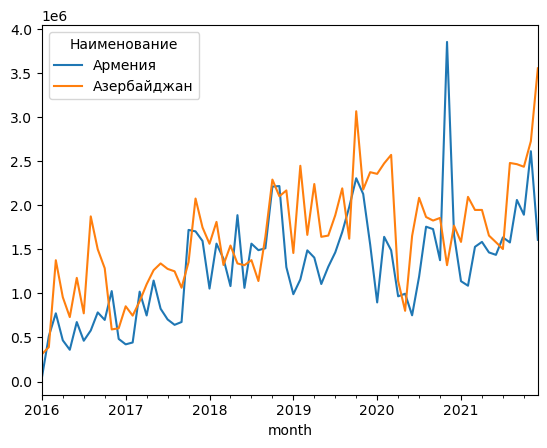

In [10]:
tab.loc[:,['Армения','Азербайджан']].plot()

<Axes: xlabel='month'>

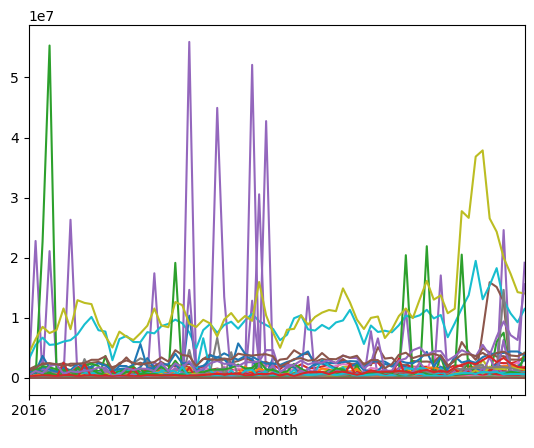

In [11]:
tab.plot(legend=False)

In [12]:
# https://dynamictimewarping.github.io/python/

In [13]:
# pip install dtw-python

In [31]:
# pip install tslearn

In [15]:
# Документация по библиотеке: https://tslearn.readthedocs.io/en/stable/auto_examples/metrics/plot_dtw_custom_metric.html

In [16]:
len(tab.columns)

76

In [17]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw",
                         max_iter=100, random_state=42)
model.fit(tab.T)

TimeSeriesKMeans(max_iter=100, metric='dtw', random_state=42)

In [18]:
pd.DataFrame(model.labels_).value_counts()

0
0    71
2     3
1     2
Name: count, dtype: int64

In [19]:
model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
len(model.labels_)

76

In [21]:
lab = pd.DataFrame([tab.columns, model.labels_], index = ['NOC', 'label']).T
lab[lab.label == 2]

,NOC,label
4,Алжир,2
22,Индия,2
24,Ирак,2


In [22]:
lab[lab.label == 1] ['NOC'].values.tolist()

['Беларусь', 'Казахстан']

<Axes: xlabel='month'>

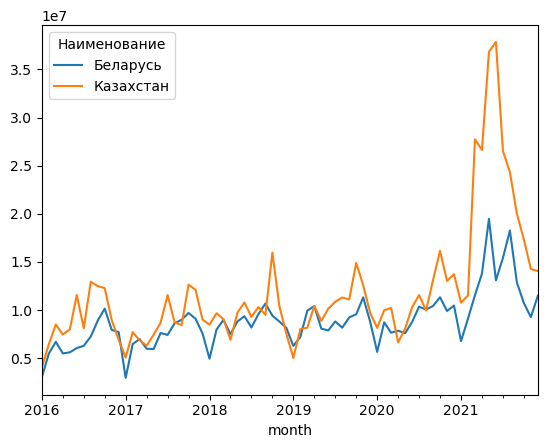

In [23]:
tab.loc[:,lab[lab.label == 1] ['NOC'].values.tolist()].plot()

In [24]:
# Сумма квадратов расстояний точек до их ближайшего центра кластера
model.inertia_

93903265345497.39

По мере возрастания численности кластеров, члены каждого из них становятся больше похожи друг на друга, но соседние кластеры при этом становятся менее различимы. Число кластеров должно быть достаточно велико, чтобы позволить выявить важные закономерности, но не слишком, чтобы кластеры сохраняли отчетливые различия. Одним из способов определить оптимальное количество кластеров является использование так называемого графика каменистой осыпи, или графика Кеттела (scree plot)

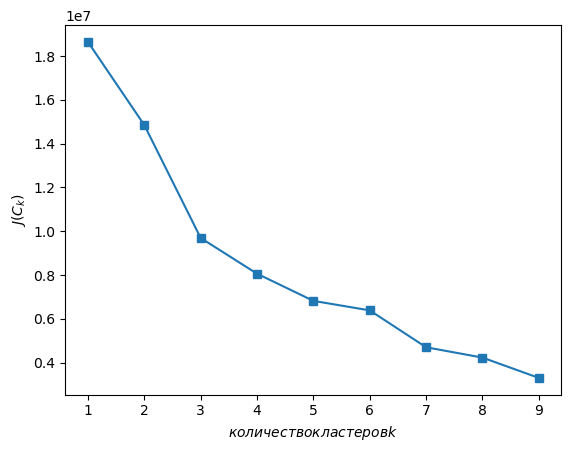

In [25]:
# Для выбора количества кластеров необходимо оценить внутрикластерное разнообразие

inertia = []
for k in range(1, 10):

    model = TimeSeriesKMeans(n_clusters=k, metric="dtw",
                         max_iter=100, random_state=42)
    model.fit(tab.T)

    inertia.append(np.sqrt(model.inertia_))

plt.plot(range(1, 10), inertia, marker='s')
plt.xlabel('$количество кластеров k$')
plt.ylabel('$J(C_k)$');

# Этот метод также получил название "метод локтевого изгиба"

Излом — это острый изгиб на графике осыпи, который предлагает оптимальное число кластеров, исходя из разумной степени внутрикластерного разнообразия, которое характеризыется расстоянием точек до их ближайшего центра кластера

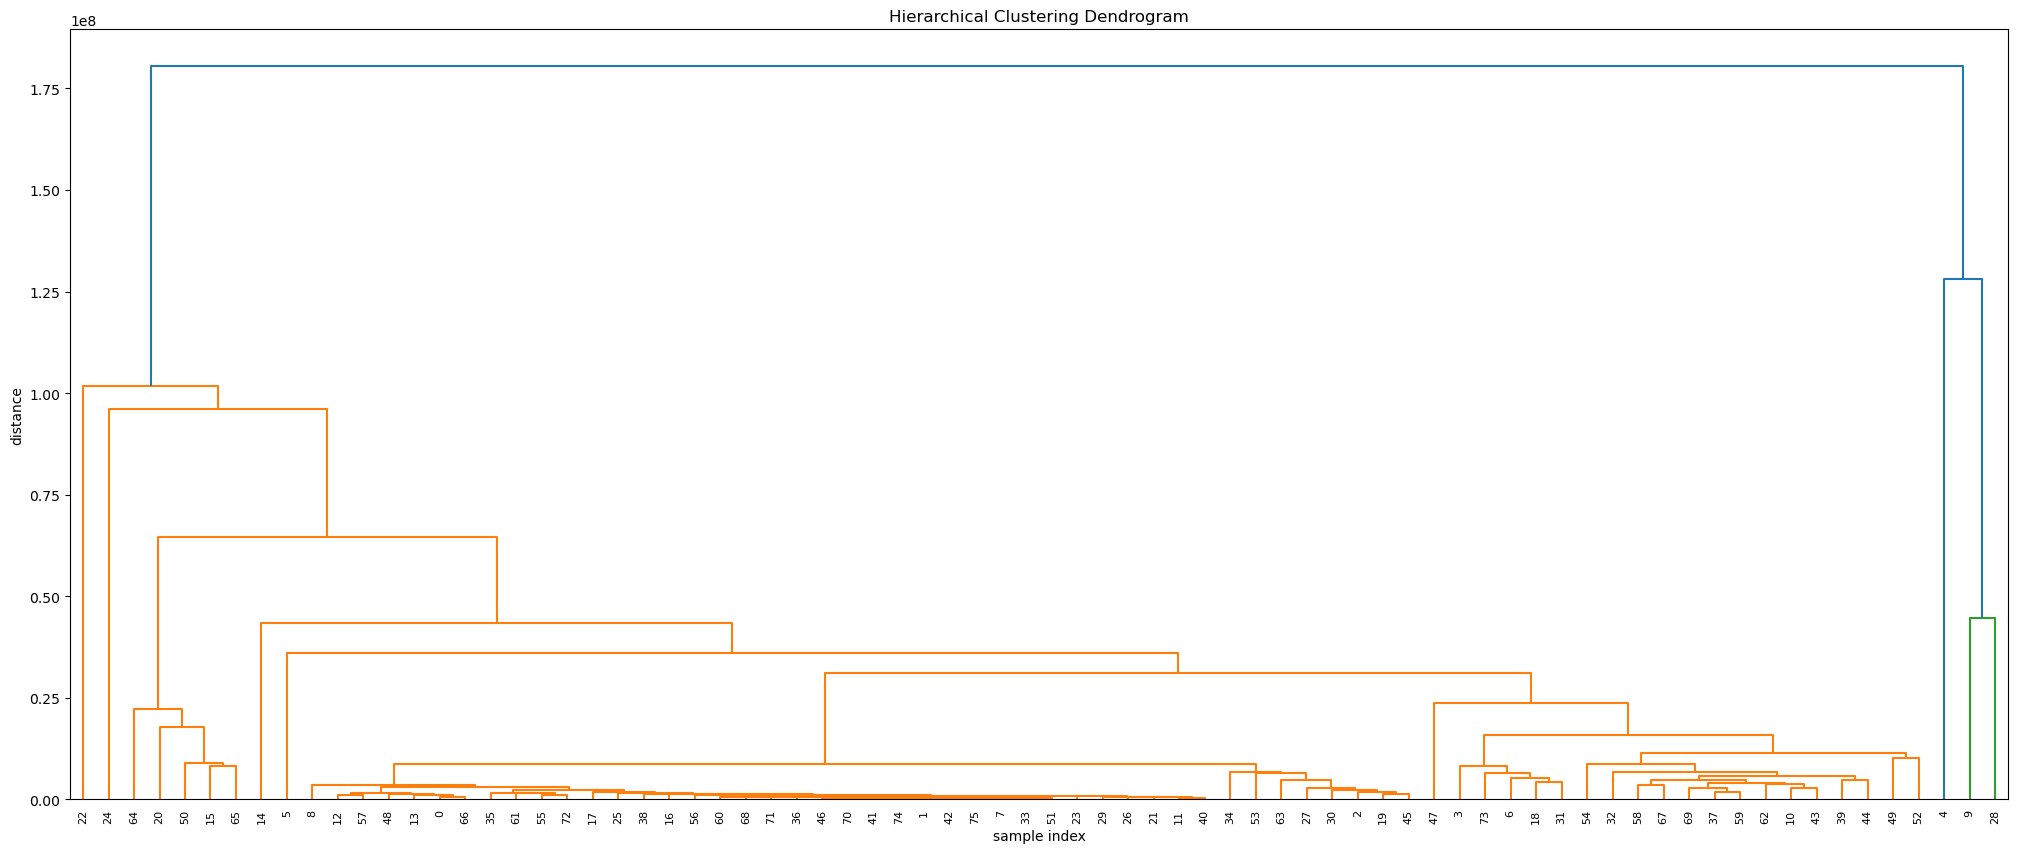

In [26]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

import seaborn as sns
from scipy import stats
import scipy.cluster.hierarchy as hac
Z = hac.linkage(tab.T, method='ward', metric='euclidean')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [27]:
tab.iloc[:,[4,9,28]]

Наименование,Алжир,Беларусь,Казахстан
month,,,
2016-01-01,0.0,3.004347e+06,4.014515e+06
2016-02-01,22787888.0,5.480527e+06,6.449184e+06
2016-03-01,0.0,6.693229e+06,8.502189e+06
2016-04-01,21098632.0,5.495055e+06,7.463560e+06
2016-05-01,1782349.0,5.604224e+06,7.979477e+06
...,...,...,...
2021-08-01,0.0,1.826629e+07,2.432635e+07
2021-09-01,24600655.0,1.286661e+07,2.001674e+07
2021-10-01,0.0,1.072810e+07,1.731864e+07


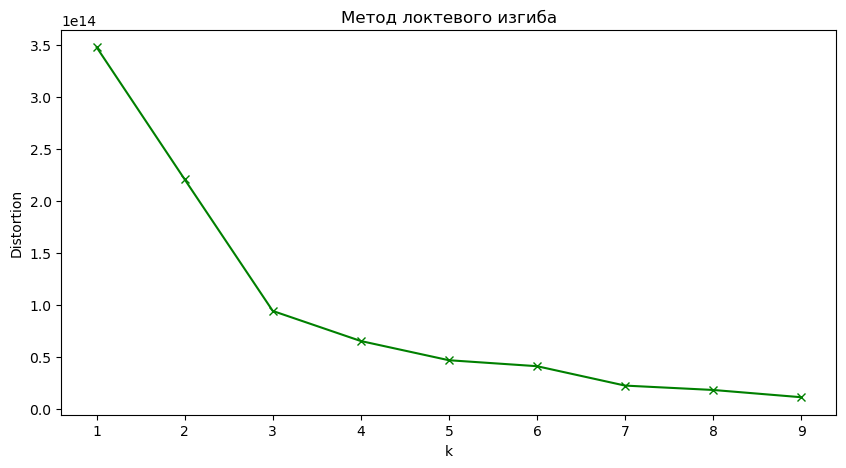

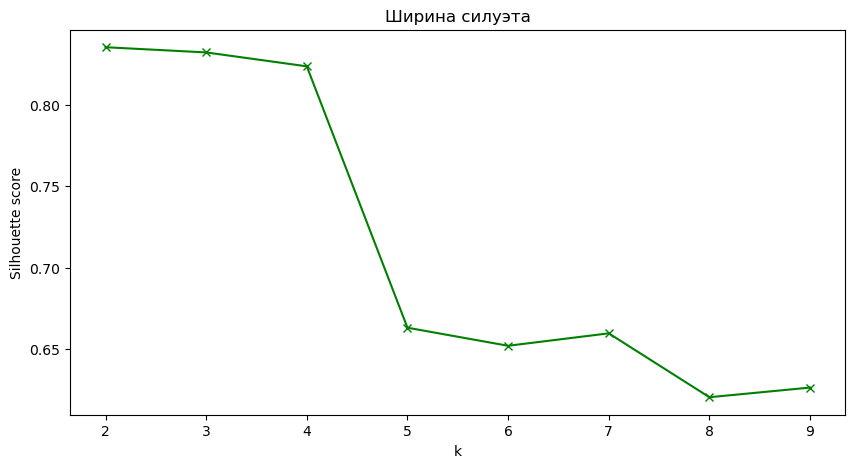

In [28]:
from sklearn.metrics import silhouette_score
distortions = []
silhouette = []
K=range(1, 10)
for k in K:
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw",
                                  n_jobs=6, max_iter=10, random_state=42)
    kmeanModel.fit(tab.T)
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(tab.T, kmeanModel.labels_))

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'gx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Метод локтевого изгиба')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(K[1:], silhouette, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Ширина силуэта')
plt.show()

https://tslearn.readthedocs.io/en/stable/auto_examples/metrics/plot_softdtw_path.html#sphx-glr-auto-examples-metrics-plot-softdtw-path-py

Метод soft-DTW обеспечивает более плавный эффект и может уменьшить влияние выбросов в данных

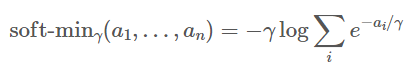

In [29]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="softdtw",
                         max_iter=10, random_state=42)
model.fit(tab.T)

TimeSeriesKMeans(max_iter=10, metric='softdtw', random_state=42)

In [30]:
pd.DataFrame(model.labels_).value_counts()

0
0    71
2     3
1     2
Name: count, dtype: int64

Дополнительно:

Каноническое искажение времени:
находит оптимальное подпространство уменьшенной размерности таким образом, чтобы последовательности были максимально линейно коррелированы

https://tslearn.readthedocs.io/en/stable/auto_examples/metrics/plot_ctw.html#sphx-glr-auto-examples-metrics-plot-ctw-py